### Importing packages:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Reading data:

In [2]:
df= pd.read_csv("segmentation data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df = df.drop(['ID'],axis=1)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [26]:
features = df.columns.tolist()
features

['Sex',
 'Marital status',
 'Age',
 'Education',
 'Income',
 'Occupation',
 'Settlement size']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


- There are no null values in the data

### Building model: K-means

K means is a unsupervised machine learning algorithm which helps us to cluster data points.


Algorithm:
- Initialize the number of cluster points
- Randomly intialize the centroid for each of those clusters.
- Determine which data points belong to which cluster by identifying the closest centroid to the data point.
- Update the centroid position by finding the geometric mean of the data points in the cluster.
- Run the previous two steps until the position of the cluster doesnt change.

Things to remember:
- perform pre-processing before implementing the model.

In [5]:
#scaling the data

data = (df - df.min())/(df.max()-df.min())*5+1 # we are scaling the values till 6 
# there are multiples values present in the given dataset which are '0'.
# hence scaling them to 6 will help us reduce the errors we might encounter later on if divided by 0.
# you can scale the values to any number you decide.
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1.0,1.0,5.224138,4.333333,2.623905,3.5,6.0
1,6.0,6.0,1.344828,2.666667,3.101052,3.5,6.0
2,1.0,1.0,3.672414,2.666667,1.975718,1.0,1.0
3,1.0,1.0,3.327586,2.666667,3.481117,3.5,3.5
4,1.0,1.0,4.017241,2.666667,3.069209,3.5,3.5


In [6]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.285000,3.482500,2.543879,2.730000,2.555986,3.026250,2.847500
std,2.491361,2.500564,1.010293,0.999633,0.696606,1.596468,2.031331
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.775862,2.666667,2.130238,1.000000,1.000000
50%,1.000000,1.000000,2.293103,2.666667,2.457170,3.500000,3.500000
75%,6.000000,6.000000,3.068966,2.666667,2.868890,3.500000,3.500000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [7]:
# initializing a random centroid
def rand_centroid(df,k):
    centroids=[]
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [29]:
data_centroids = rand_centroid(data,3)

In [30]:
data_centroids

,0,1,2
Sex,6.000000,1.000000,1.000000
Marital status,1.000000,1.000000,1.000000
Age,1.862069,3.500000,2.465517
Education,4.333333,2.666667,2.666667
Income,2.998084,2.067828,2.343152
Occupation,3.500000,3.500000,1.000000
Settlement size,3.500000,1.000000,3.500000


In [31]:
# label each datapoint
def crt_labels(df,centroids):
    dist = data_centroids.apply(lambda x: np.sqrt(((df-x)**2).sum(axis=1))) # using eucledian distanceeu
    return dist.idxmin(axis=1)

In [32]:
labels = crt_labels(data,data_centroids)

In [33]:
labels.value_counts()

0    917
2    664
1    419
dtype: int64

In [34]:
def new_centroids(df,labels,k):  
    return df.groupby(labels).apply(lambda x:np.exp(np.log(x).mean())).T

In [35]:
# we need this as we have a multidimensional data , and visualizing multidimensional data is difficult.
from sklearn.decomposition import PCA 
from IPython.display import clear_output

In [36]:
def plt_clusters(df,labels,centroids,iters):
    pca = PCA(n_components=2) #reducing to 2 dimensional data
    df_2 = pca.fit_transform(df)
    centroids_2 = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f"Iterations:{iters}")
    plt.scatter(x=df_2[:,0],y=df_2[:,1],c=labels)
    plt.scatter(x=centroids_2[:,0],y=centroids_2[:,1])
    plt.show()

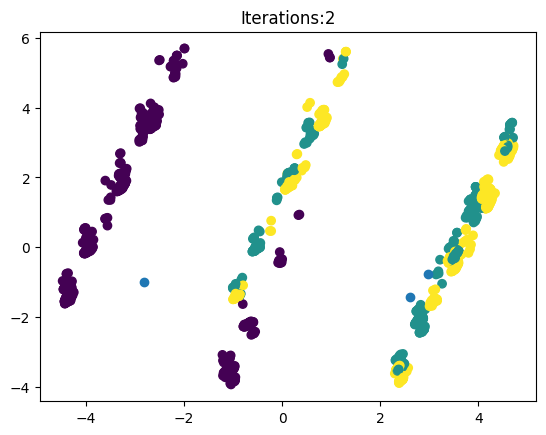

In [37]:
max_iters = 50
k = 3
centroids = rand_centroid(data,k)
old_centroids = pd.DataFrame()
iters = 1

while iters<max_iters and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = crt_labels(data,centroids)
    centroids = new_centroids(data,labels,k)
    plt_clusters(data,labels,centroids,iters)
    iters+=1

In [38]:
centroids

,0,1,2
Sex,5.964932,1.000000,1.000000
Marital status,4.237438,1.546787,1.507062
Age,2.171308,3.045863,2.273252
Education,2.877626,2.704352,2.013001
Income,2.337116,2.704570,2.515538
Occupation,2.214985,3.219270,2.583826
Settlement size,1.662104,1.782511,3.387544


- We can now analyze the clusters we got after implementing the model

In [39]:
labels.value_counts()

0    917
2    664
1    419
dtype: int64

In [40]:
df[labels==0] #people who belong to cluster 0.

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1,1,1,22,1,150773,1,2
10,1,1,25,1,108469,1,0
11,1,1,24,1,127596,1,0
12,1,1,22,1,108687,1,2
14,1,1,28,1,102899,1,1
...,...,...,...,...,...,...,...
1992,1,0,51,1,101074,0,0
1993,1,0,38,1,87670,0,0
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0


In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [45]:
kmeans = KMeans(3)
kmeans.fit(data)

/home/ash/SNU/ML/snuml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [46]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
Sex,6.000000,2.514630,1.014641
Marital status,6.000000,1.826162,2.178624
Age,2.309736,2.546531,2.793936
Education,3.103714,2.440046,2.573939
Income,2.473505,2.175973,2.968130
Occupation,2.854620,1.920826,4.151537
Settlement size,2.423234,1.137694,4.759151


In [47]:
score = silhouette_score(data,labels, metric='euclidean')

In [48]:
print(f"Silhoutter score:{score}")

Silhoutter score:0.24989764214621504
